#### Medidas de centralidade
- Media (afetada por outliers)
- Mediana
- Moda ( valor mais frequente na amostra

#### Medidas de propagação
- DP - Mede a variabilidade dos dados (sum(yi -ym)^2/(n-1))^0.5
- Quanto maior o desvio maior, pensar em estoque de segurança para atender a demanda dos clientes

#### Conceitos

- Outliers - observaçõe que estão distante da média ( longe da mioria das) observações -- além do padrão de distribuição. Remover antes da modelagem. Identificar a causa (evento não regular) - promoção, feriado
- 1º quartil - valor aos 25 % da amostra ordenada separa os 25% de dados inferiores
- 2º quartil - mediana
- 3 º quartil - valor aos 75 % da amostra ordenada
- Percentil indica que há x% de dados inferiores Lp= (n-1)*p/100 +1

#### Regressão linear
- Utilizada para modelar a relação entre 2 variaveis( uma dependente outra independente)
- Variavel dependente (aquela que estamos tentando prever ) - vendas
- Variavel independente - exemplo: preço
- Encontre a e b com LINEST

#### Distribuições demanda e tempo

- Intermitente - Alta variabilidade no tempo da demanda e baixa variabilidade na quantidade demandada
- Lumpy - Alta variabilidade no tempo da demanda e alta variabilidade na quantidade demandada (muito dificil de prever)

In [92]:
# Demanda do suco em 500 dias 
import numpy as np
import statistics
def medidas_centralidade_e_propagação():
    suco_apple = np.random.uniform(2,500, 1000).round()
    print(f"A média é",suco_apple.mean())
    print(f"A médiana é",statistics.median(suco_apple))
    print(f"A moda é",statistics.mode(suco_apple))
    print(f"O desvio é", statistics.stdev(suco_apple))
    print(f"O range é ", max(suco_apple)-min(suco_apple))
    print(f"A variância  é", statistics.variance(suco_apple))
    print(f"50 % dos dados são inferiores à", np.percentile(suco_apple,50))
medidas_centralidade_e_propagação()

A média é 250.628
A médiana é 245.5
A moda é 178.0
O desvio é 141.29252348653552
O range é  496.0
A variância  é 19963.577193193192
50 % dos dados são inferiores à 245.5


In [91]:
amostras = [1, 2, 6, 13, 13, 14, 14, 14, 15, 15, 16, 18, 18, 18, 20,25]
def identificando_outliers(amostras):
    if len(amostras)%2 ==0:
        mediana = (amostras[int((len(amostras)-2)/2)] + amostras[int((len(amostras)-2)/2)+1])/2
        primeiro_quartil = amostras[int(0.25*(len(amostras)))-1]
        terceiro_quartil= amostras[int(0.75*(len(amostras)))-1]
    else:
        mediana = amostras[int((len(amostras) -2)/2 +1)]
        primeiro_quartil = (amostras[int(0.25*(len(amostras)))] + amostras[int(0.25*(len(amostras)))+1])/2
        terceiro_quartil= (amostras[int(0.75*(len(amostras)))-1] + amostras[int(0.75*(len(amostras)))])/2

    IIQ = terceiro_quartil - primeiro_quartil
    limiar_inferior = primeiro_quartil - 1.5*IIQ
    limiar_superior = terceiro_quartil + 1.5*IIQ

    outliers = [i for i in amostras if i < limiar_inferior or i > limiar_superior ]
    return outliers

#### Correlações

In [3]:
import pandas as pd
import seaborn as sns

In [14]:
class Documento:
    def __init__(self, name):
        self.name =name
        self.df = {}
    def carregar_dados(self):
        self.df = pd.read_csv(self.name)
        return self.df
    def limpar_dados(self):
        return self.df.dropna(axis = 0)
    def corr(self, a, b):
        x = self.df.iloc[:, [a,b]].corr()
        sns.heatmap(x)
    def cilindros(self):
        return self.df['cylenders'].value_counts()
        
        

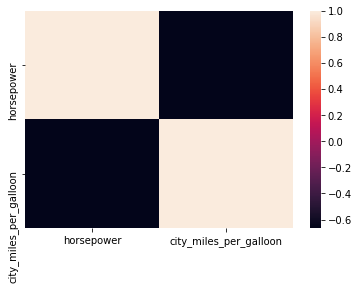

In [16]:
doc = Documento('cars.csv')
don = doc.carregar_dados()
clean = doc.limpar_dados()
doc.corr(12, 13)
cili = doc.cilindros()

#### Regressão Linear

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [9]:
pricing = pd.read_excel('pricing.xlsx', engine='openpyxl' )
X = pricing.Price.values.reshape(-1,1) #variável independente
y = pricing.Demand
model = LinearRegression()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)
pricing['predict']=model.predict(X)
pricing

[-10.]
500.0


,Demand,Price,predict
0,400,10.0,400.0
1,380,12.0,380.0
2,370,13.0,370.0
3,390,11.0,390.0
4,395,10.5,395.0
5,410,9.0,410.0
6,430,7.0,430.0
7,412,8.8,412.0
8,370,13.0,370.0


#### Teste hipotese
- Verificar se a frequência com que um determinado acontecimento observado em uma amostra se desvia significativamente ou não da frequência com que ele é esperado
- hipotese nula ( segue uma distribuição normal) –frequências observadas = frequências esperadas
- if p-value > 0.05 (não rejeito a hipotese nula)
- if p-value < 0.05 (rejeito hipotese)

In [6]:
from scipy.stats import norm, normaltest, kstest
import pandas as pd
import numpy as np
import scipy.stats as st

In [12]:
skus = pd.read_csv('sku_distributions.csv')
dist_names = ["norm","exponweib", "weibull_max", "weibull_min","pareto"]

apple_juice = np.array(skus['apple_juice'])
mean = apple_juice.mean()
sd = apple_juice.std()
# Concluimos que não rejeitamos a hipotese nula e de fato parece que a distribuição segue uma normal
kstest(apple_juice, 'norm', args=(mean,sd))
# qual distribuição é melhor ajustada a partir de uma variedade de distribuição normal
result = []
parameters = {}
norm_param = getattr(st, 'norm')
norm_param.fit(apple_juice)
for dist in dist_names:
    param = getattr(st, dist)
    fitting =  param.fit(apple_juice)
    test = kstest(apple_juice, dist, args = fitting)
    result.append([dist, test])
    print("the result for dist "+ dist+' is '+str(test))
#Conclui-se que de fato nossa distribuição é normal

the result for dist norm is KstestResult(statistic=0.04011911785947586, pvalue=0.6423077067552097)
the result for dist exponweib is KstestResult(statistic=0.7149966358707146, pvalue=1.1842591378527938e-172)
the result for dist weibull_max is KstestResult(statistic=0.8212900008150043, pvalue=2.2685136143704807e-247)
the result for dist weibull_min is KstestResult(statistic=0.7912570467437425, pvalue=3.3455808063457176e-223)
the result for dist pareto is KstestResult(statistic=0.37806737069342256, pvalue=2.8156556467198532e-43)


#### Trabalhando com datas

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
retail = pd.read_csv('online_retail2.csv')
ratail= retail.drop_duplicates()
retail=retail.replace('None', float("nan")).dropna()
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['InvoiceDate'].max() - retail['InvoiceDate'].max()
#para id (X) qual a máxima da data, ultima data que cliente comprou
last_purchase_Date = retail.groupby('Customer ID', as_index=False)['InvoiceDate'].max()
last_purchase_Date['Recency'] = retail['InvoiceDate'].max() - last_purchase_Date['InvoiceDate']
last_purchase_Date['Recency'] = last_purchase_Date['Recency'].dt.components['days']

In [ ]:
# Que fizeram commpra no 100 dias atrás temos muitos clientes
plt.hist(last_purchase_Date['Recency'])
plt.show()

In [113]:
#Com que freuqencia o cliente chega a loja
customers=np.unique(retail['Customer ID'])

In [114]:
print(customers)

[12346. 12347. 12348. ... 18285. 18286. 18287.]


In [115]:
len(customers)

5942

In [116]:
retail['date']=retail['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [119]:
#imprimeee pra vc sempre entender não deixa nada passar batido
# date só tem uma unica
customer_grouped = retail.groupby(['Customer ID', 'date'], as_index=False).count()[['Customer ID', 'date']]

In [129]:
c_d = customer_grouped[customer_grouped['Customer ID']==12346.0]

In [ ]:
# fazer a duração entre uma compra e outra
inter_data = pd.DataFrame()
for customer in customers:
    c_d = customer_grouped[customer_grouped['Customer ID']==customer]
    c_d['previous_date'] = c_d['date'].shift(1)
    inter_data = pd.concat([inter_data, c_d], axis=0)

In [137]:
inter_data.head()

,Customer ID,date,previous_date
0,12346.0,2009-12-14,NaN
1,12346.0,2009-12-18,2009-12-14
2,12346.0,2010-01-04,2009-12-18
3,12346.0,2010-01-14,2010-01-04
4,12346.0,2010-01-22,2010-01-14


In [138]:
inter_data['date']=pd.to_datetime(inter_data['date'])

In [139]:
inter_data['previous_date']=pd.to_datetime(inter_data['previous_date'])
#duração entre uma compra e outra
inter_data['duration'] = inter_data['date']-inter_data['previous_date']

In [143]:
inter_data['duration']=inter_data['duration'].dt.components['days']

In [144]:
inter_arrival = inter_data.groupby('Customer ID')['duration'].mean()

In [1]:
import pandas as pd

In [2]:
stocks = pd.read_csv('stocks.csv', index_col='Date', parse_dates=True)

<AxesSubplot:xlabel='Date'>

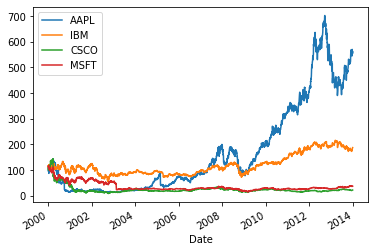

In [3]:
stocks.plot()

In [5]:
monthly = stocks.resample('M').mean()
year = stocks.resample('Y').mean()
semana = stocks.resample('W').mean()
quarter_series_sum = stocks.resample('W').sum()

In [ ]:
MSFT = stocks[['MSFT']]
MSFT['rolling_weekly'] = MSFT.rolling(window=7).mean()
MSFT['rolling_monthly'] = MSFT['MSFT'].rolling(window=30).mean()

<ipython-input-157-8e4eb35fc6ac>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  MSFT['Aug-2011'].plot()


<AxesSubplot:xlabel='Date'>

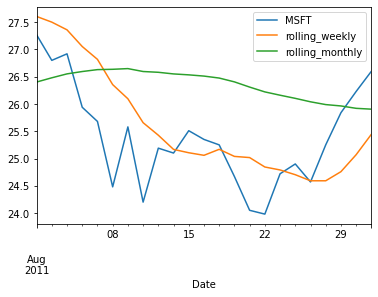

In [157]:
MSFT['Aug-2011'].plot()

#### Segmentation 
- Você pode segmentar o cliente, o produto, fornecedores
- Lei de Pareto : 80 % dos efeitos vem de 20 % dos custos

In [25]:
!pip install inventorize3

Using legacy 'setup.py install' for inventorize3, since package 'wheel' is not installed.
    Running setup.py install for inventorize3: started
    Running setup.py install for inventorize3: finished with status 'done'


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import inventorize3 as inv

In [21]:
retail = pd.read_csv('online_retail2.csv')
ratail= retail.drop_duplicates()
retail=retail.replace('None', float("nan")).dropna()
retail = retail[retail.Quantity>0]
retail_clean=retail.copy()
retail_clean['Revenue'] = retail['Price']*retail['Quantity']
retail_clean.to_csv('retail_clean.csv')
group = retail_clean.groupby('Description').agg(total_sales=('Quantity', np.sum), total_revenue=('Revenue', np.sum)).reset_index()

In [22]:
group.head()

,Description,total_sales,total_revenue
0,DOORMAT UNION JACK GUNS AND ROSES,169,1084.75
1,3 STRIPEY MICE FELTCRAFT,663,1243.05
2,4 PURPLE FLOCK DINNER CANDLES,340,535.96
3,50'S CHRISTMAS GIFT BAG LARGE,1885,2272.25
4,ANIMAL STICKERS,385,80.85


In [27]:
#porcentagem acumulativa de quanto a total da vend representa nas vendas totais ( dai categoriza em ABC)
a = inv.ABC(group[['Description', 'total_sales']])

In [28]:
a.Category.value_counts()

C    2886
B    1244
A    1153
Name: Category, dtype: int64

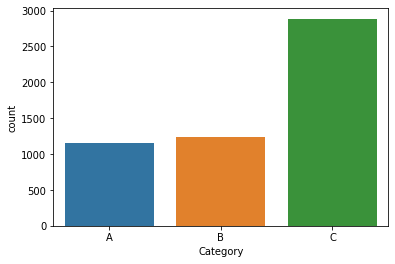

In [39]:
sns.countplot(x='Category', data=a)
plt.show()

<AxesSubplot:xlabel='Category', ylabel='total_sales'>

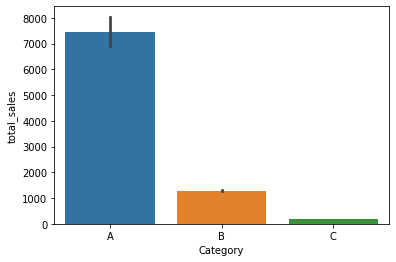

In [41]:
sns.barplot(x='Category',y='total_sales', data=a)

In [31]:
group.head()

,Description,total_sales,total_revenue
0,DOORMAT UNION JACK GUNS AND ROSES,169,1084.75
1,3 STRIPEY MICE FELTCRAFT,663,1243.05
2,4 PURPLE FLOCK DINNER CANDLES,340,535.96
3,50'S CHRISTMAS GIFT BAG LARGE,1885,2272.25
4,ANIMAL STICKERS,385,80.85


In [32]:
b= inv.productmix(group['Description'], group['total_sales'], group['total_revenue'])
b.product_mix.value_counts()
#C_A vendas baixa que geram receitas altas

C_C    2398
A_A     777
B_B     631
C_B     418
B_C     329
A_B     312
B_A     284
C_A      70
A_C      64
Name: product_mix, dtype: int64

In [37]:
print(b)

                                    skus  sales     revenue     sales_mix  \
3769            REGENCY CAKESTAND 3 TIER  24914  286486.300  2.323868e-03   
5047  WHITE HANGING HEART T-LIGHT HOLDER  93640  252072.460  8.734324e-03   
3129         PAPER CRAFT , LITTLE BIRDIE  80995  168469.600  7.554855e-03   
2860                              Manual   9810  152340.570  9.150333e-04   
2392             JUMBO BAG RED RETROSPOT  75759  136980.080  7.066464e-03   
...                                  ...    ...         ...           ...   
894          CAT W SUNGLASSES BLANK CARD      4       0.760  3.731023e-07   
4046     SET 12 COLOURING PENCILS DOILEY      1       0.650  9.327557e-08   
2181      HAPPY BIRTHDAY GINGER CAT CARD      2       0.380  1.865511e-07   
3357     PINK HEART CHRISTMAS DECORATION      1       0.380  9.327557e-08   
3079          PADS TO MATCH ALL CUSHIONS     18       0.017  1.678960e-06   

      comulative_sales   revenue_mix  comulative_revenue sales_category  \


<AxesSubplot:xlabel='product_mix', ylabel='count'>

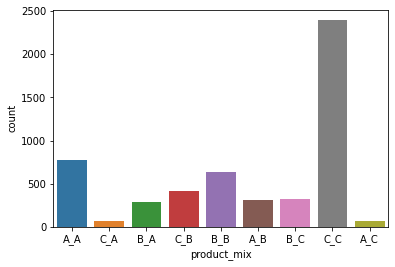

In [33]:
sns.countplot(x='product_mix', data=b)

<AxesSubplot:xlabel='product_mix', ylabel='sales'>

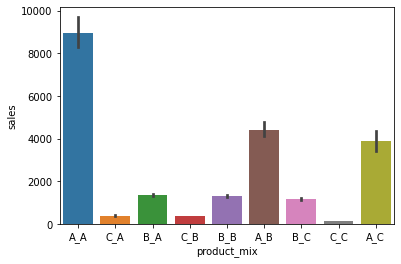

In [36]:
sns.barplot(x='product_mix', y='sales', data=b)

<AxesSubplot:xlabel='product_mix', ylabel='revenue'>

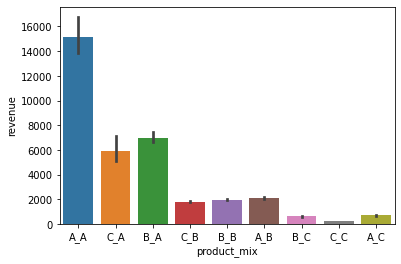

In [38]:
sns.barplot(x='product_mix', y='revenue', data=b)
